# Prueba de controlador de motor en C++ -rotateTo()

**Limitación**: no maneja bien el cambiar a velocidad contraria cuando se pasa del setpoint. Revisar esa parte.

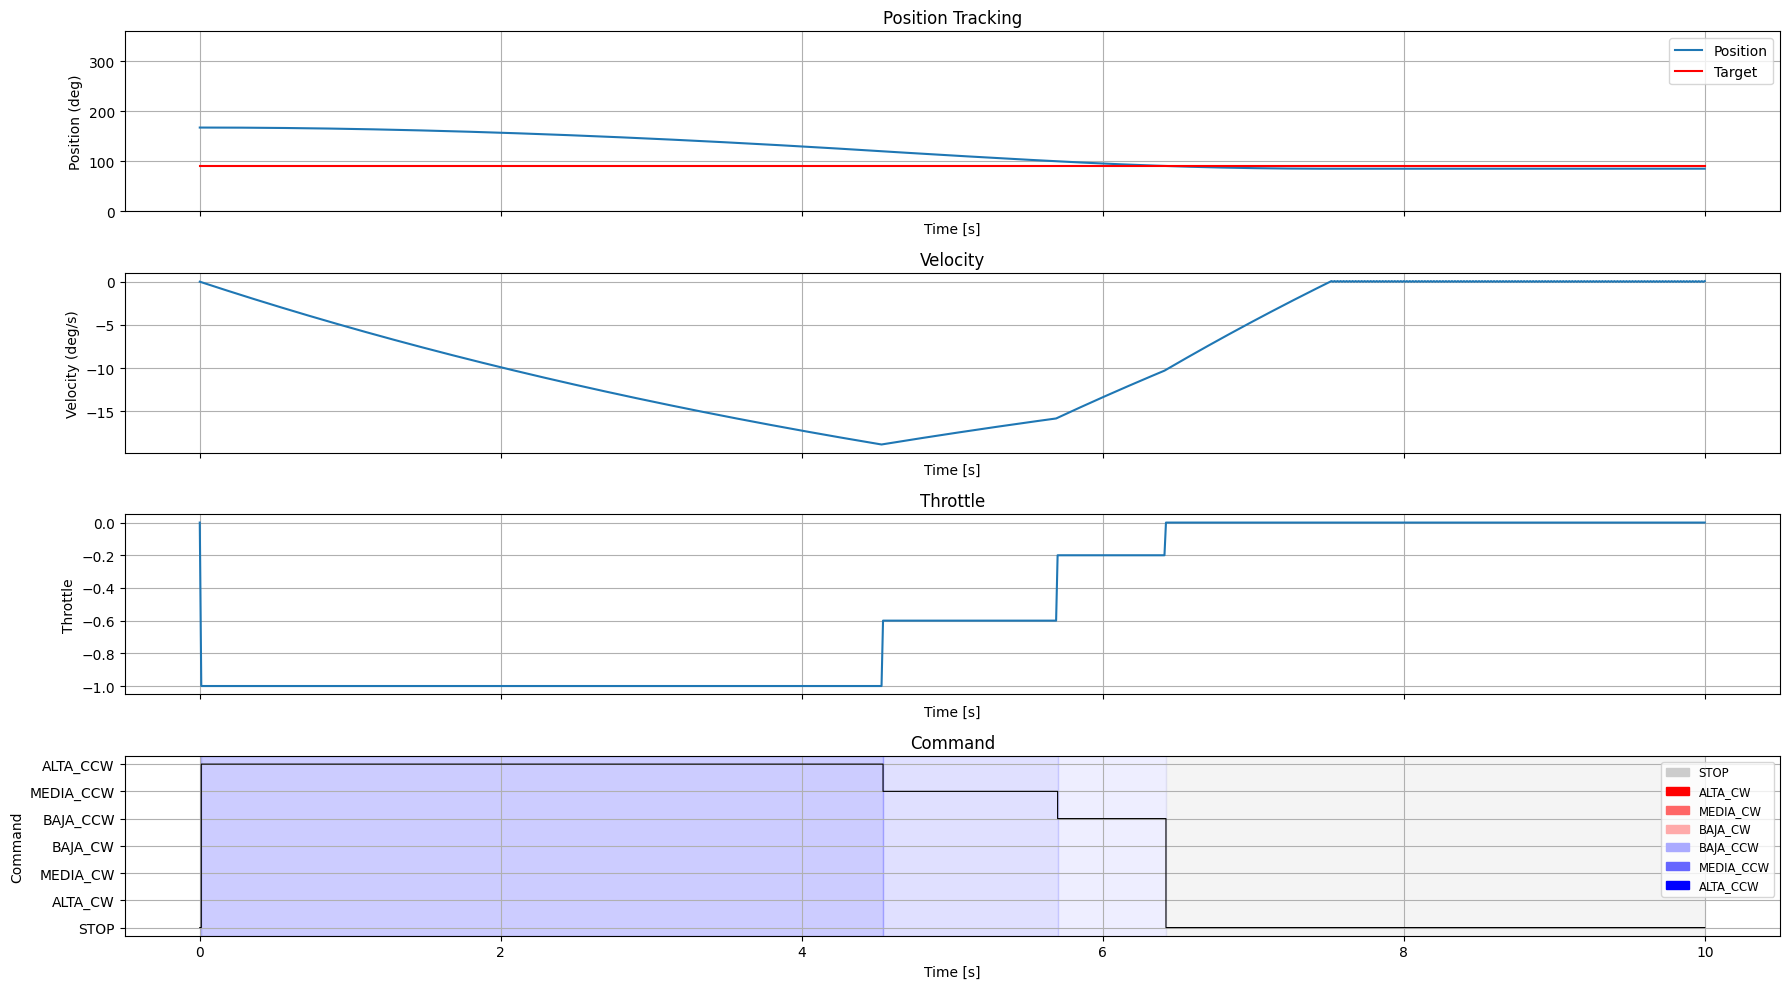

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

MOTOR_LOG_CSV_FILENAME="cpp/motor_controller/build/manual_control_test.csv"
df = pd.read_csv(MOTOR_LOG_CSV_FILENAME)
df.head()

wrapped_deg = df["pos_deg"].values
unwrapped_rad = np.unwrap(np.deg2rad(wrapped_deg))
unwrapped_deg = np.rad2deg(unwrapped_rad)

df["position_unwrapped_deg"] = unwrapped_deg

# Crear figura con 4 subplots verticales
fig, axes = plt.subplots(4, 1, figsize=(18, 10), sharex=True)

# Posición envuelta vs unwrapped
axes[0].plot(df["t"], df["pos_deg"], label="Position")
#axes[0].plot(df["t"], df["position_unwrapped_deg"], label="Unwrapped")
axes[0].plot(df["t"], df["target"],color='red',label="Target")
axes[0].set_ylabel("Position (deg)")
axes[0].set_ylim(0,360.0)
axes[0].set_xlabel("Time [s]")
axes[0].set_title("Position Tracking")
axes[0].legend()
axes[0].grid(True)

# Velocidad
axes[1].plot(df["t"], df["vel_deg_s"])
axes[1].set_ylabel("Velocity (deg/s)")
axes[1].set_xlabel("Time [s]")
axes[1].set_title("Velocity")
axes[1].grid(True)

# Throttle
axes[2].plot(df["t"], df["throttle"])
axes[2].set_ylabel("Throttle")
axes[2].set_xlabel("Time [s]")
axes[2].set_title("Throttle")
axes[2].grid(True)

# CMD
import matplotlib.patches as mpatches

motor_cmd_labels = [
    "STOP", "ALTA_CW", "MEDIA_CW", "BAJA_CW",
    "BAJA_CCW", "MEDIA_CCW", "ALTA_CCW"
]

colors = [
    "#cccccc",  # STOP
    "#ff0000",  # ALTA_CW
    "#ff6666",  # MEDIA_CW
    "#ffaaaa",  # BAJA_CW
    "#aaaaff",  # BAJA_CCW
    "#6666ff",  # MEDIA_CCW
    "#0000ff",  # ALTA_CCW
]

# Dibujar fondo con axvspan
prev_cmd = df["cmd"].iloc[0]
start_time = df["t"].iloc[0]

for i in range(1, len(df)):
    current_cmd = df["cmd"].iloc[i]
    if current_cmd != prev_cmd:
        end_time = df["t"].iloc[i]
        axes[3].axvspan(start_time, end_time, color=colors[int(prev_cmd)], alpha=0.2)
        start_time = end_time
        prev_cmd = current_cmd

# Agregar último tramo
axes[3].axvspan(start_time, df["t"].iloc[-1], color=colors[int(prev_cmd)], alpha=0.2)

# Plot de línea (opcional)
axes[3].step(df["t"], df["cmd"], where="post", linewidth=0.8, color="black")
axes[3].set_yticks(range(len(motor_cmd_labels)))
axes[3].set_yticklabels(motor_cmd_labels)
axes[3].set_ylabel("Command")
axes[3].set_xlabel("Time [s]")
axes[3].set_title("Command")
axes[3].grid(True)

# Agregar leyenda
legend_patches = [
    mpatches.Patch(color=colors[i], label=motor_cmd_labels[i])
    for i in range(len(motor_cmd_labels))
]
axes[3].legend(handles=legend_patches, loc="upper right", fontsize="small")

plt.tight_layout()
plt.show()
